In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile


In [2]:

zf = zipfile.ZipFile('../users_essay.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open('users_essay.csv'))

# display dataset
df.head()

,Unnamed: 0,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN


In [3]:
df1=df.drop(['Unnamed: 0'], axis = 1) 

In [4]:
df1.isna().sum()

essay0    2577
essay1    3646
essay2    4559
essay3    5471
essay4    4948
essay5    5201
essay6    6479
essay7    5960
essay8    9035
essay9    5862
dtype: int64

In [5]:
df1_new = df1.dropna()

In [6]:
df1_new.shape

(13839, 10)

In [15]:
#Removing the html tags in the texts
clean_df = df1_new.replace({r'<[A-Za-z\/][^>]*>' : '', r'\n' : ' ', r'http[^ ]*[ ]' : ' ', r'http[^ ]*' : ''}, regex=True)
clean_df.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
5,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
9,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells
10,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
11,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."


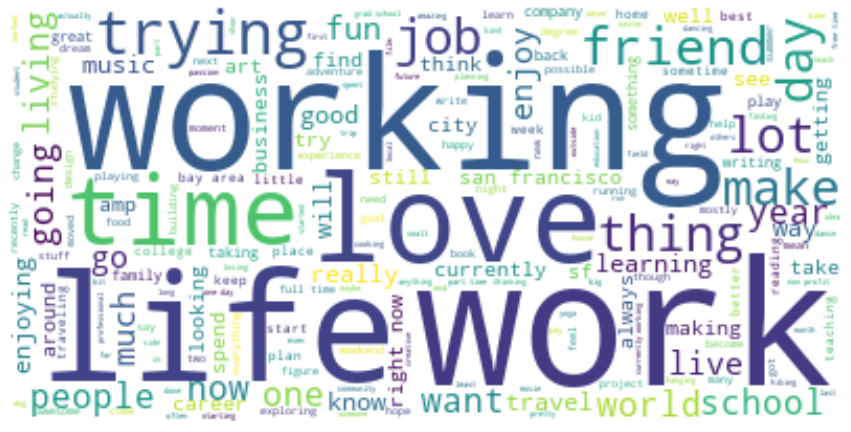

In [16]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


text = " ".join(i for i in clean_df.essay1)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [17]:
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
clean_df['combined_essay'] = clean_df[essay_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
clean_df

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,combined_essay
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...
5,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,"i'm an australian living in san francisco, but..."
9,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,my names jake. i'm a creative guy and i look f...
10,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,"update: i'm seeing someone, so off the market ..."
11,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ..."
...,...,...,...,...,...,...,...,...,...,...,...
27742,"-grew up in west hollywood, went to artsy priv...",fighting with computers.,-finding waldo -applying saran wrap to contai...,my heart of gold.,a: the secret history / donna tartt boys life ...,-sectionals and conversation pits -anything s...,things to add to my to do list what i wanna e...,shouting over really loud music at a bar with ...,"i take the ""three second rule"" to unhealthy ex...",you think we could make beautiful music together.,"-grew up in west hollywood, went to artsy priv..."
27743,spent most of my early life in nj but have bee...,scheming up new adventures daily!,"making crepes, ignoring my alarm clock, and go...",that i'm oblivious to people noticing me... an...,"books: a million little pieces, blink, tipping...",1. a sunny warm day 2. music 3. fresh bread 4....,all the awesome places in the world i still wa...,a. beat up from work and enjoying some wine or...,i'm a big fan of costume parties and although ...,you like brunettes and if you enjoy the outdoo...,spent most of my early life in nj but have bee...
27744,"i teach, travel, perform and tell stories. hum...","storytelling, circus, clowning, mime, teaching...","adaptation - life's always changing, so you'd ...","i love serious conversations, debates, quiet l...","this was the hardest section to trim down, so ...",time and energy to create. great food. regular...,teaching. lesson planning. t

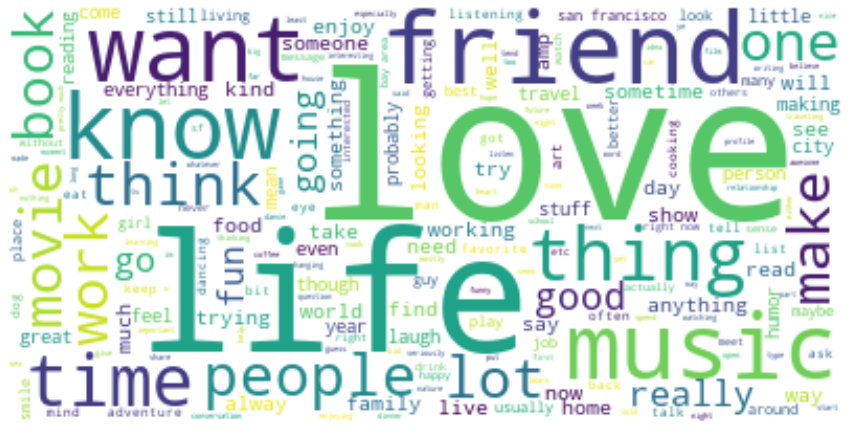

In [18]:
text = " ".join(i for i in clean_df.combined_essay)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


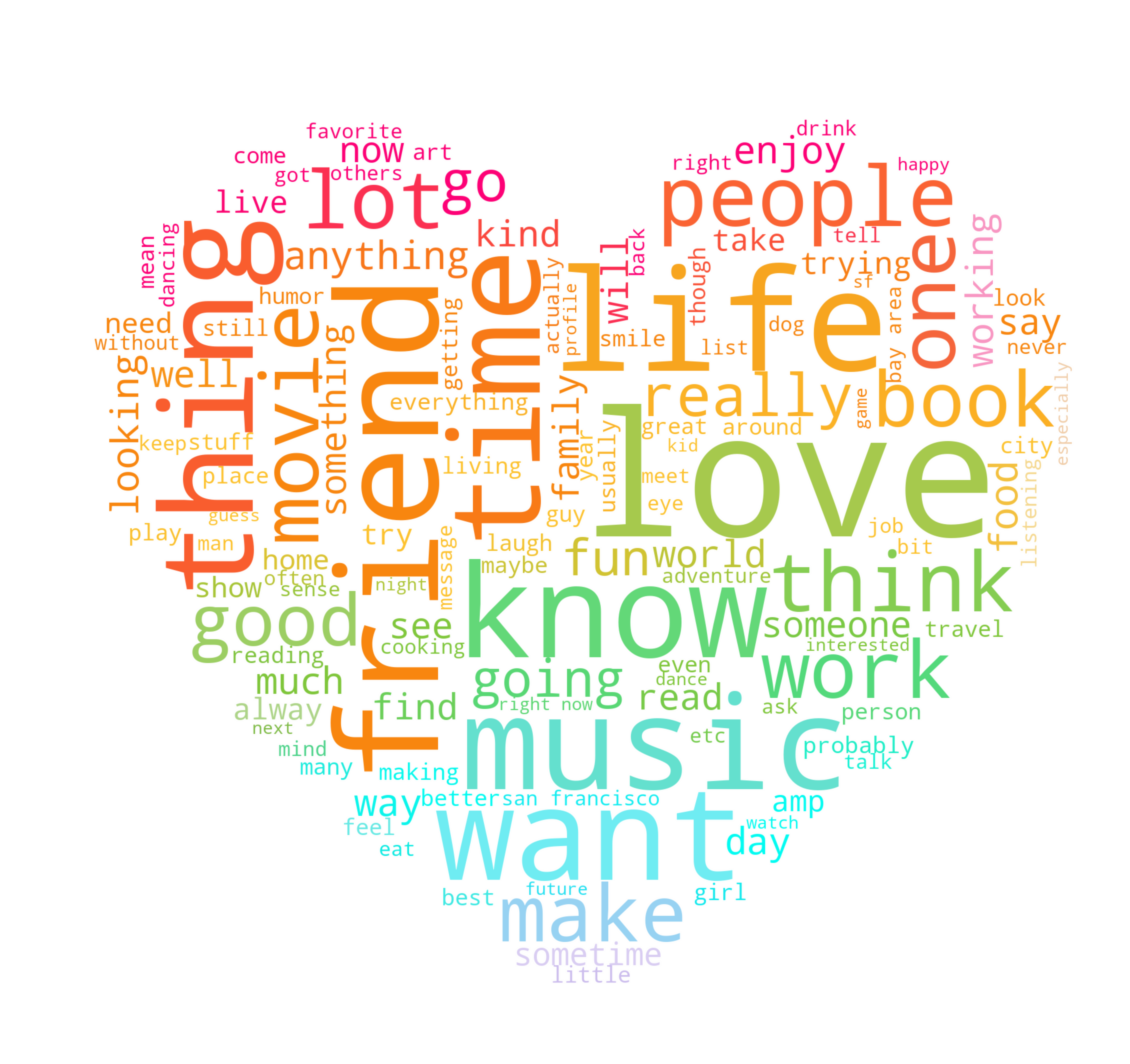

In [19]:
from PIL import Image

custom_mask = np.array(Image.open("Input_img/heart.png"))
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,
                       mask=custom_mask,
                       width=1600,
                       height=800,
                       colormap='PuRd',
                       margin=0,
                       max_words=500,
                       max_font_size=300, min_font_size=30, 
                       background_color="white").generate(' '.join(clean_df['combined_essay']))

image_colors = ImageColorGenerator(custom_mask)
wordcloud.recolor(color_func=image_colors)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
#plt.savefig("word_cloud.png", format="png")
plt.show()

In [12]:
# Raw data file
profile_df = pd.read_csv('../Okcupid.csv')
 
# display dataset
profile_df.head()

,Unnamed: 0,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [13]:
profile_df1=profile_df.drop(['Unnamed: 0'], axis = 1) 

In [22]:
#creating a new dataframe with essays and genders
gender = profile_df1["sex"]
clean_df = clean_df.join(gender)
clean_df.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,combined_essay,sex
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,about me: i would love to think that i was so...,m
5,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,"i'm an australian living in san francisco, but...",m
9,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,my names jake. i'm a creative guy and i look f...,m
10,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,"update: i'm seeing someone, so off the market ...",m
11,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...","i was born in wisconsin, grew up in iowa, and ...",m


In [29]:
essay_df=clean_df.loc[:, clean_df.columns.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4','essay5','essay6','essay7','essay8', 'essay9' ])]
essay_df.head()

,combined_essay,sex
0,about me: i would love to think that i was so...,m
5,"i'm an australian living in san francisco, but...",m
9,my names jake. i'm a creative guy and i look f...,m
10,"update: i'm seeing someone, so off the market ...",m
11,"i was born in wisconsin, grew up in iowa, and ...",m


In [30]:
group_essay=clean_df.groupby(['sex'])
group_essay

In [35]:
#Checking for the most repeated words by gender:
men_essays = []
men = clean_df[clean_df.sex == 'm']
for essay in men['combined_essay']:
    men_essays.append(essay)   
men_essays = [x for x in men_essays if str(x) != 'nan']
men_essays = ' '.join(men_essays)

women_essays = []
women = clean_df[clean_df.sex == 'f']
for essay in women['combined_essay']:
    women_essays.append(essay)
women_essays = [x for x in women_essays if str(x) != 'nan']
women_essays = ' '.join(women_essays)

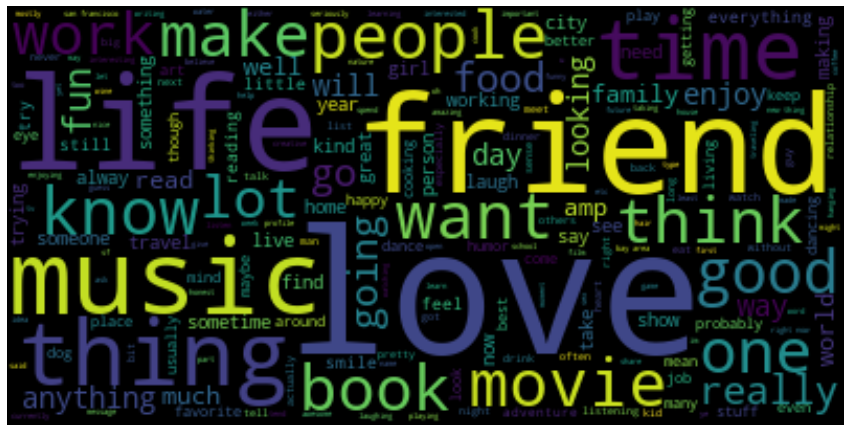

In [45]:

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(women_essays)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


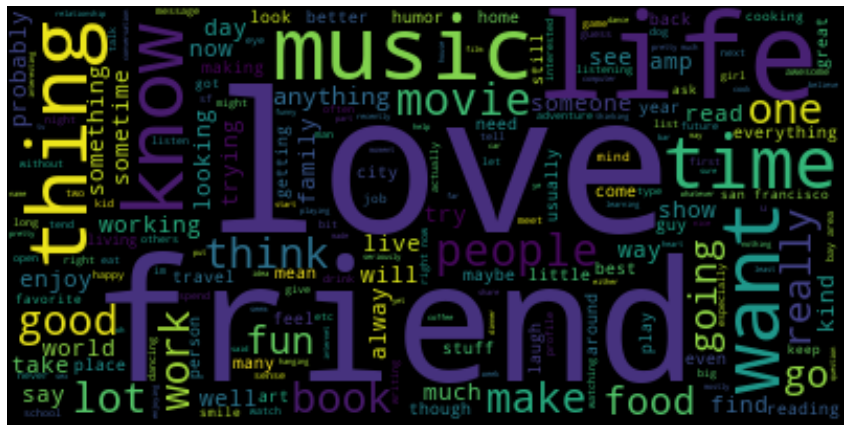

In [46]:

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(men_essays)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [48]:
#Removing the html tags in the texts
essay_df =essay_df.replace({r'<[A-Za-z\/][^>]*>' : '', r'\n' : ' ', r'http[^ ]*[ ]' : ' ', r'http[^ ]*' : ''}, regex=True)
essay_df.head()

,combined_essay,sex
0,about me: i would love to think that i was so...,m
5,"i'm an australian living in san francisco, but...",m
9,my names jake. i'm a creative guy and i look f...,m
10,"update: i'm seeing someone, so off the market ...",m
11,"i was born in wisconsin, grew up in iowa, and ...",m


In [67]:
## Let's examine some essays now
## We are going to start with most
## repeated words by gender
import scipy.stats as stats
import nltk
from textblob import TextBlob


import seaborn as sns
men_words = men_essays.split()
men_freq = nltk.FreqDist(men_words)
men_freq = men_freq.most_common(2000)

women_words = women_essays.split()
women_freq = nltk.FreqDist(women_words)
women_freq = women_freq.most_common(2000)

men_women_df = pd.concat([pd.DataFrame(men_freq)[0], pd.DataFrame(women_freq)[0]], axis=1)
men_women_df.columns = ['men', 'women']
men_women_df.head(15)

,men,women
0,i,i
1,and,and
2,the,the
3,to,to
4,a,a
5,of,my
6,my,of
7,in,in
8,i'm,i'm
9,you,you


In [74]:
## Here we will take the top 2000 words and find the unique
## words for each gender

men = pd.DataFrame(men_freq)[0]
women = pd.DataFrame(women_freq)[0]

unique_men = list(set(men) - set(women))
unique_women = list(set(women) - set(men))

unique_df = pd.concat([pd.DataFrame(unique_men), pd.DataFrame(unique_women)], axis=1)
unique_df.columns = ['unique_men', 'unique_women']
unique_df

,unique_men,unique_women
0,university,life!
1,"or,",parties
2,normal,alice
3,question.,historical
4,cant,"stones,"
...,...,...
160,tennis,chick
161,ill,florence
162,"gym,","warm,"
163,minutes,velvet


In [78]:
unique_df['unique_men'].value_counts().head(60)

university      1
industry        1
electric        1
math            1
nice,           1
mark            1
billy           1
built           1
ideas,          1
tasty           1
soccer          1
-i              1
us.             1
monty           1
first,          1
card            1
piano           1
kurt            1
carry           1
spare           1
uc              1
ago,            1
daft            1
brother         1
store           1
attending       1
win             1
engineering     1
evening         1
web             1
vonnegut,       1
say.            1
flying          1
ghost           1
runner,         1
martial         1
theory          1
profile,        1
internet.       1
sports.         1
rings,          1
tall,           1
simpsons,       1
think.          1
&nbsp;          1
gay             1
recently,       1
character       1
wes             1
train           1
blah            1
america         1
living.         1
soon.           1
comic           1
entertaini

In [79]:
unique_df['unique_women'].value_counts().head(60)

life!             1
organizing        1
ray               1
side.             1
searching         1
bell              1
parties,          1
harold            1
stevie            1
felt              1
machine,          1
adore             1
fabulous          1
catcher           1
concerts          1
npr               1
edward            1
throwing          1
meditation        1
silly,            1
glee,             1
trips,            1
handle            1
go,               1
jobs              1
jane              1
tea,              1
ocean,            1
ethnic            1
prince,           1
animals,          1
ever.             1
journey           1
inspired          1
painting,         1
bon               1
confident,        1
friendly,         1
photos            1
raw               1
new,              1
chemistry         1
issues            1
fully             1
experiencing      1
sweet,            1
kids.             1
foods,            1
relationships,    1
rare              1


Text(0.5, 1.0, 'Unique words for Men')

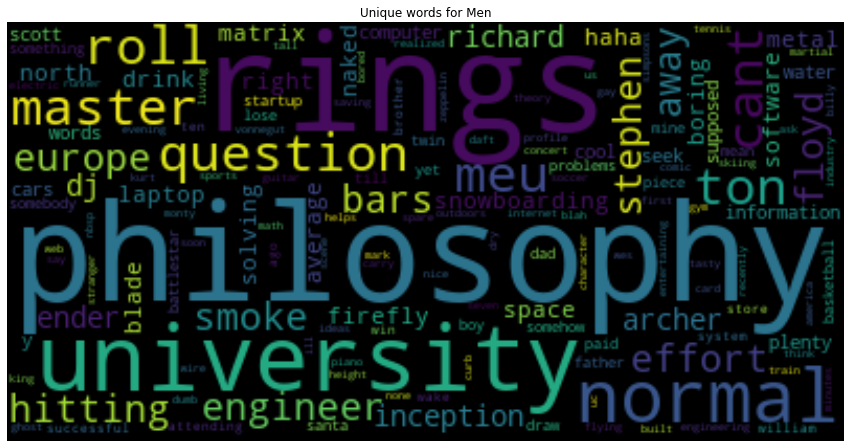

In [82]:
stopwords = set(STOPWORDS)
men_wordcloud = WordCloud(stopwords=stopwords, max_words=165, random_state=1, background_color="black").generate(' '.join(unique_men))
plt.figure( figsize=(15,10))
plt.imshow(men_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Men")


Text(0.5, 1.0, 'Unique words for Women')

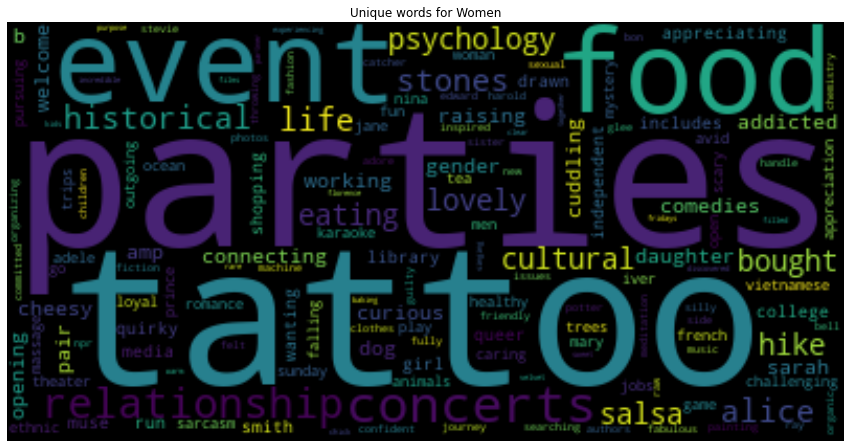

In [80]:
stopwords = set(STOPWORDS)
women_wordcloud = WordCloud(stopwords=stopwords,max_words=165, background_color="black", random_state=1).generate(' '.join(unique_women))
plt.figure( figsize=(15,10))
plt.imshow(women_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Women")